heigth -> 345 width -> 805 radius -> 40
heigth -> 798 width -> 715 radius -> 40
heigth -> 179 width -> 823 radius -> 40
heigth -> 482 width -> 905 radius -> 40
heigth -> 461 width -> 978 radius -> 40
heigth -> 317 width -> 303 radius -> 40
heigth -> 341 width -> 545 radius -> 40
heigth -> 166 width -> 904 radius -> 40
heigth -> 774 width -> 541 radius -> 40
heigth -> 793 width -> 883 radius -> 40
heigth -> 924 width -> 564 radius -> 40
heigth -> 645 width -> 696 radius -> 40
heigth -> 943 width -> 731 radius -> 40
heigth -> 947 width -> 822 radius -> 40
heigth -> 655 width -> 788 radius -> 40
heigth -> 335 width -> 894 radius -> 40
heigth -> 772 width -> 951 radius -> 40
heigth -> 189 width -> 346 radius -> 40
heigth -> 348 width -> 627 radius -> 40
heigth -> 646 width -> 876 radius -> 40
heigth -> 330 width -> 438 radius -> 40
heigth -> 473 width -> 471 radius -> 40
heigth -> 644 width -> 609 radius -> 40
heigth -> 491 width -> 647 radius -> 40
heigth -> 469 width -> 383 radius -> 40


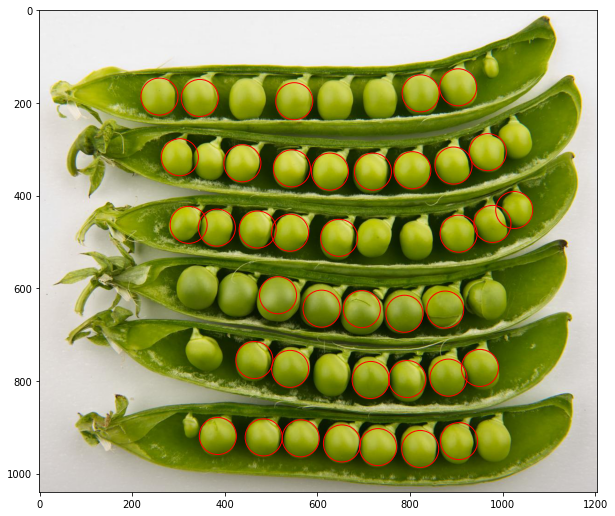

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
import cv2
from PIL import Image
from skimage import morphology, io
from skimage.color import rgb2gray


def hough_circle(img,radius, threshold, supp, num):
    # img - binarny obrazok - hrany
    # radius - polomer hladanej kruznice
    # threshold - percentualne oznacenie thresholdu od maximalnej hodnoty accumulatora
    # supp - okolie vrcholu

    height, width = img.shape # rozmery vlozeneho obrazka
    image_edges = np.argwhere(img) # ulozenie suradnic hranovych bodov obrazka

    accumulator = np.zeros((height+2*radius,width+2*radius)) # inicializacia houghovo priestoru
    # priestor ma rozmery povodneho obrazka zvacsene o priemer hladanej kruznice - overflow problem
    # accumulator pre kruznicu je vo vseobecnosti trojrozmerny avsak ak pozname polomer hladanej
    # kruznice mozeme ho eliminovat do 2D


    # stredovy tvar rovnice kruznice je dany predpisom
    # (x - m)^2 + (y - n)^2 = r^2
    # respektive kruznicu mozeme vyjadrit parametricky
    # x = m + r * cos(theta)
    # y = n + r * sin(theta)
    # kde theta je z intervalu 0, 2*PI

    thetas = np.arange(0,360)*np.pi/180 # ziskanie intervalu theta
    circle = np.zeros((2*radius+1,2*radius+1)) # hladana kruznica

    for theta in thetas:
        x = int(np.round(radius*np.cos(theta))) # suradnice x bodov hladanej kruznice
        y = int(np.round(radius*np.sin(theta))) # suradnice y bodov hladanej kruznice
        circle[radius + x, radius + y] = 1 # znacenie hladanej kruznice

    # stred ziskanej kruznice budeme postupne ukladat na jednotlive suradnice hranovych bodov
    # cim budeme zapisovat hlasy do accumulatora
    for x,y in image_edges:
        X = [ x , x + 2 * radius]
        Y = [ y , y + 2 * radius]
        accumulator[X[0]:X[1],Y[0]:Y[1]] += circle[0:circle.shape[0]-1, 0:circle.shape[1]-1]

    #thresh = threshold*np.max(accumulator) # aplikovanie thresholdu na odfiltrovanie
    thresh = threshold * np.argwhere(circle).shape[0]/radius # aplikovanie thresholdu na odfiltrovanie

    accumulator = accumulator[radius:-radius, radius:-radius] # orezanie accumulatora na rozmery povodneho obrazku
    #plt.figure(figsize=(10,10))
    #plt.imshow(accumulator, cmap='gray')

    peaks = []
    continue_search = True

    while continue_search:
        value = np.max(accumulator)
        index = np.where(accumulator == value)
        idx = (index[0][0], index[1][0])

        if value > thresh:
            peaks.append(idx)

            # indexovanie cez houghov priestor
            x_min = idx[1] - supp
            if x_min < 0: x_min = 0
            x_max = idx[1] + supp
            if x_max > accumulator.shape[1]: x_max = accumulator.shape[1]

            y_min = idx[0] - supp
            if y_min < 0: y_min = 0
            y_max = idx[0] + supp
            if y_max > accumulator.shape[0]: y_max = accumulator.shape[0]

            accumulator[y_min:y_max, x_min:x_max] = 0
        else:
            continue_search = False


    if not peaks:
        return []
    elif len(peaks) < num:
        return peaks[0:len(peaks)]
    else:
        return peaks[0:num]

def MiroslavUhlar(img):
    image= rgb2gray(img)
    image = canny(image,sigma=4)
    radius = 40
    threshold = 8.3
    supp = 30
    num = 100
    peaks = hough_circle(image,radius,threshold,supp,num)
    fig, ax = plt.subplots(figsize= (10, 10))
    ax.imshow(img, cmap = 'gray')
    vector_pixels = []
    numberOfPeaks = len(peaks)
    for peak in peaks:
        print("heigth -> " + str(peak[0]) + " width -> " + str(peak[1]) + " radius -> " + str(radius))
        ax.add_artist(plt.Circle((peak[1],peak[0]), radius, fill= False, color= 'r'))
        vector_pixels.append((peak[0],peak[1]))
    return numberOfPeaks,np.array(vector_pixels)

image_orig = io.imread('hrach.jpg')
number_of_peas, pixelCoordinates = MiroslavUhlar(image_orig)


